In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("./temp_datalab_records_social_facebook.csv")
data.head()

/Users/avallonking/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


Calculate the volatility of talking about counts of all companies.

In [13]:
# volatility of talking about counts
volatility = data[['username', 'talking_about_count']].groupby('username').std()

pandas.core.frame.DataFrame

As we can see, CBSNews is the company with highest volatility of talking about counts.

In [29]:
volatility.dropna().sort_values(by='talking_about_count', ascending=False).iloc[:5,:]

,talking_about_count
username,
CBSNews,852774.807781
manchesterunited,690647.941761
Storyful,674762.393334
yahoo,650379.771238
usatoday,538876.429033


Now let's have a detailed look at CBSNews

In [23]:
data['time'] = pd.to_datetime(data['time'])

The relationship between talking about counts of CBS News and time is shown below. As we can see, there is a peak in October, 2016.

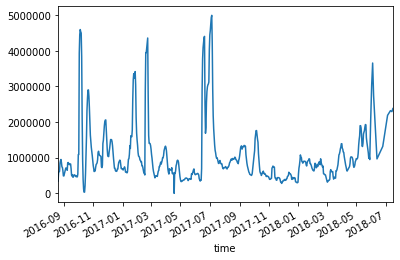

In [28]:
data.loc[data['username'] == 'CBSNews', :].set_index('time')['talking_about_count'].plot()

Let's zoom in to October, 2016 and see how the talking about counts of CBS News changes. It shows that CBS News got much attention on 2016-10-05 to 2016-10-09 and on 2016-10-20 to 2016-10-24. I think that is because there was the second US presidential debate on 2016-10-09 and the third US presidential detbate on 2016-10-19.

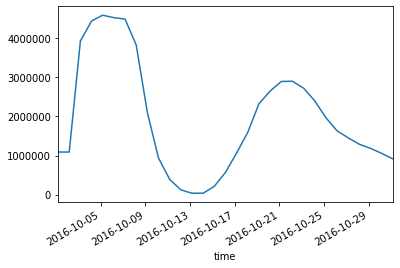

In [50]:
ax = data.loc[(data['username'] == 'CBSNews') & (data['time'].dt.year == 2016) & (data['time'].dt.month == 10), :]\
.set_index('time')['talking_about_count'].plot()

Next, I labeled each peak in the figure, showing that public events or news can explain why CBS News got very high talking about counts on some dates.

Text(2018-04-15, 3800000, "Trump's policy of family\nseparation at the border")

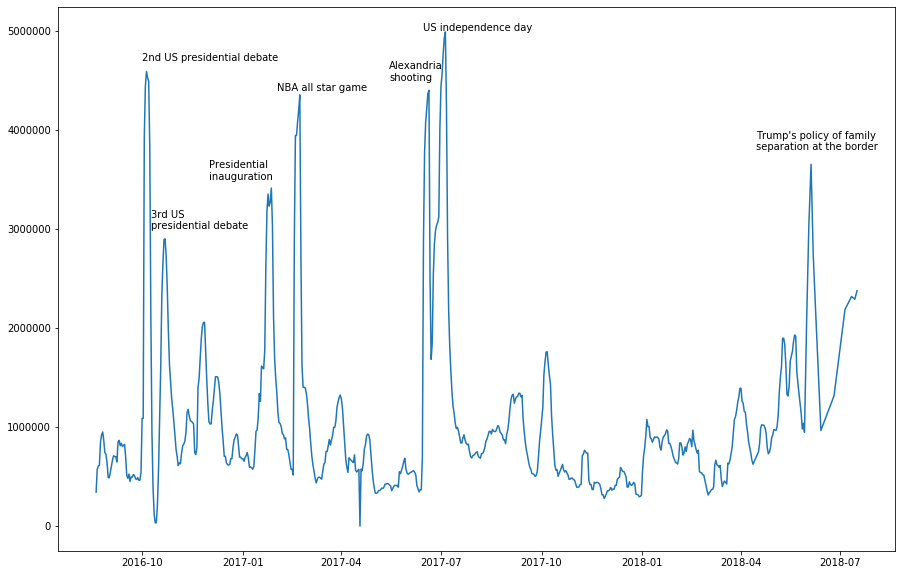

In [116]:
fig, ax = plt.subplots(figsize=(15, 10))
# data.loc[data['username'] == 'CBSNews', :].set_index('time')['talking_about_count'].plot(ax=ax)
df = data.loc[data['username'] == 'CBSNews', ['time', 'talking_about_count']]
ax.plot(df['time'], df['talking_about_count'])
ax.text('2016-10-01', 4700000, '2nd US presidential debate')
ax.text('2016-10-09', 3000000, '3rd US\npresidential debate')
ax.text('2016-12-01', 3500000, 'Presidential\ninauguration')
ax.text('2017-02-01', 4400000, 'NBA all star game')
ax.text('2017-05-15', 4500000, 'Alexandria\nshooting')
ax.text('2017-06-15', 5000000, 'US independence day')
ax.text('2018-04-15', 3800000, 'Trump\'s policy of family\nseparation at the border')